import


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import missingno as msno
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, make_scorer, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")


In [26]:
df = pd.read_csv('heart_cleveland_upload - heart_cleveland_upload.csv')

In [27]:
df.head()
df['condition'].value_counts()  

condition
0    160
1    137
Name: count, dtype: int64

In [28]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 297    │ │ int64       │ 13    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA   ┃ NA %    ┃ mean      ┃ sd        ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ age            │    0 │       0 │     54.54 │      9.05 │    29 │    48 │    56 │    61 │     77 │ ▁▃▅▇▅▁  │  │
│ │ sex            │    0 │       0 │    0.6768 │    0.4685 │     0 │     0 │     1 │     1 │      1 │ ▃    ▇  │  │
│ │ cp             │    0 │       0 │     2.158 │    0.9649 │     0 │     2 │     2 │     3 │      3 │ ▁ ▃ ▅▇  │  │
│ │ trestbps       │    0 │       0 │     131.7 │     17.76 │    94 │   120 │   130 │   140 │    200 │  ▃▇▇▃▁  │  │
│ │ chol           │    0 │       0 │     247.4 │        52 │   126 │   211 │   243 │   276 │    564 │   ▂▇▃   │  │
│ │ fbs            │    0 │       0 │    0.1448 │    0.3525 │     0 │     0 │     0 │     0 │      1 │ ▇    ▁  │  │
│ │ restecg        │    0 │       0 │    0.9966 │    0.9949 │     0 │     0 │     1 │     2 │      2 │ ▇    ▇  │  │
│ │ thalach        │    0 │       0 │     149.6 │     22.94 │    71 │   133 │   153 │   166 │    202 │  ▂▃▇▇▁  │  │
│ │ exang          │    0 │       0 │    0.3266 │    0.4698 │     0 │     0 │     0 │     1 │      1 │ ▇    ▃  │  │
│ │ oldpeak        │    0 │       0 │     1.056 │     1.166 │     0 │     0 │   0.8 │   1.6 │    6.2 │  ▇▃▁▁   │  │
│ │ slope          │    0 │       0 │    0.6027 │    0.6182 │     0 │     0 │     1 │     1 │      2 │ ▇  ▇ ▁  │  │
│ │ ca             │    0 │       0 │    0.6768 │     0.939 │     0 │     0 │     0 │     1 │      3 │ ▇ ▃ ▂▁  │  │
│ │ thal           │    0 │       0 │     0.835 │    0.9567 │     0 │     0 │     0 │     2 │      2 │ ▇  ▁ ▆  │  │
│ │ condition      │    0 │       0 │    0.4613 │    0.4993 │     0 │     0 │     0 │     1 │      1 │ ▇    ▇  │  │
│ └────────────────┴──────┴─────────┴───────────┴───────────┴───────┴───────┴───────┴───────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [29]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

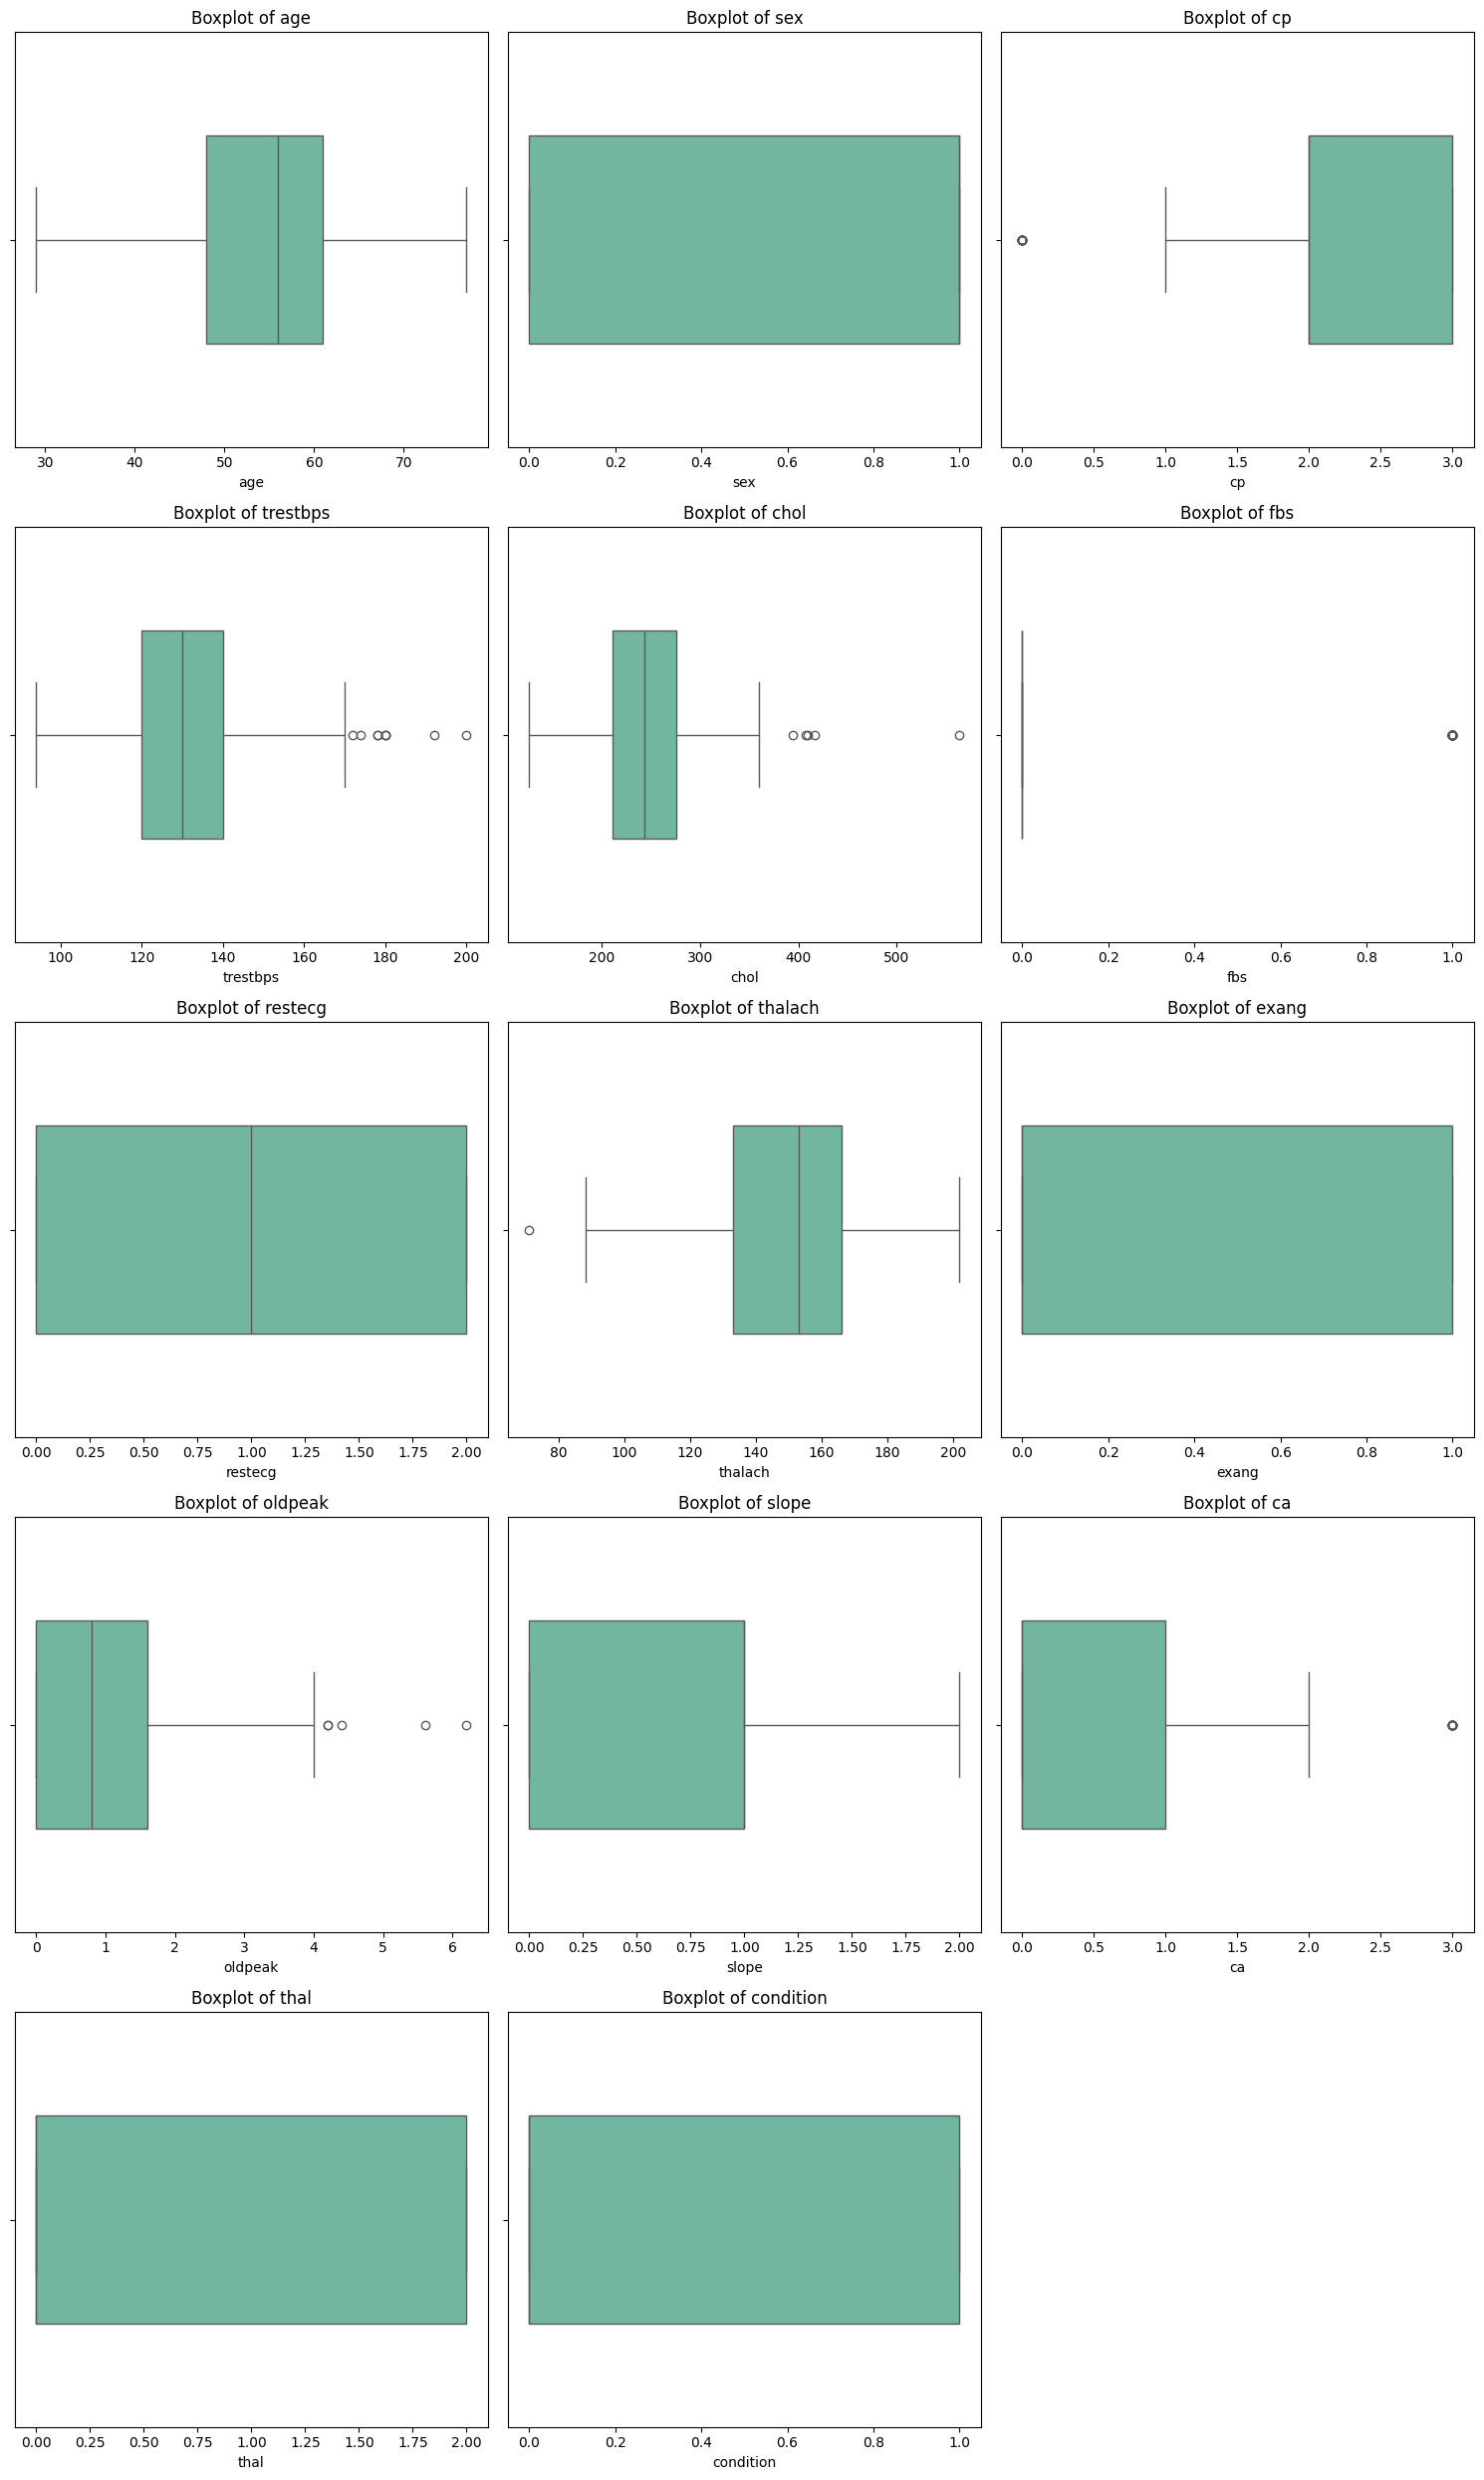

In [30]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5 * n_rows))
axes = axes.flatten() 
for  i , col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i] , palette='Set2', hue=None, width=0.5)
    axes[i].set_title(f'Boxplot of {col}')
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j]) 
    
plt.tight_layout() 



In [31]:
# remove outliers fron the whole dataset
for col in numeric_cols:
    data = df[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Remove outliers with caps and replace them with the median
    df[col] = np.where(data < lower_bound, data.median(), df[col])
    df[col] = np.where(data > upper_bound, data.median(), df[col])
# check the shape of the dataframe after removing outliers

  
df.shape

(297, 14)

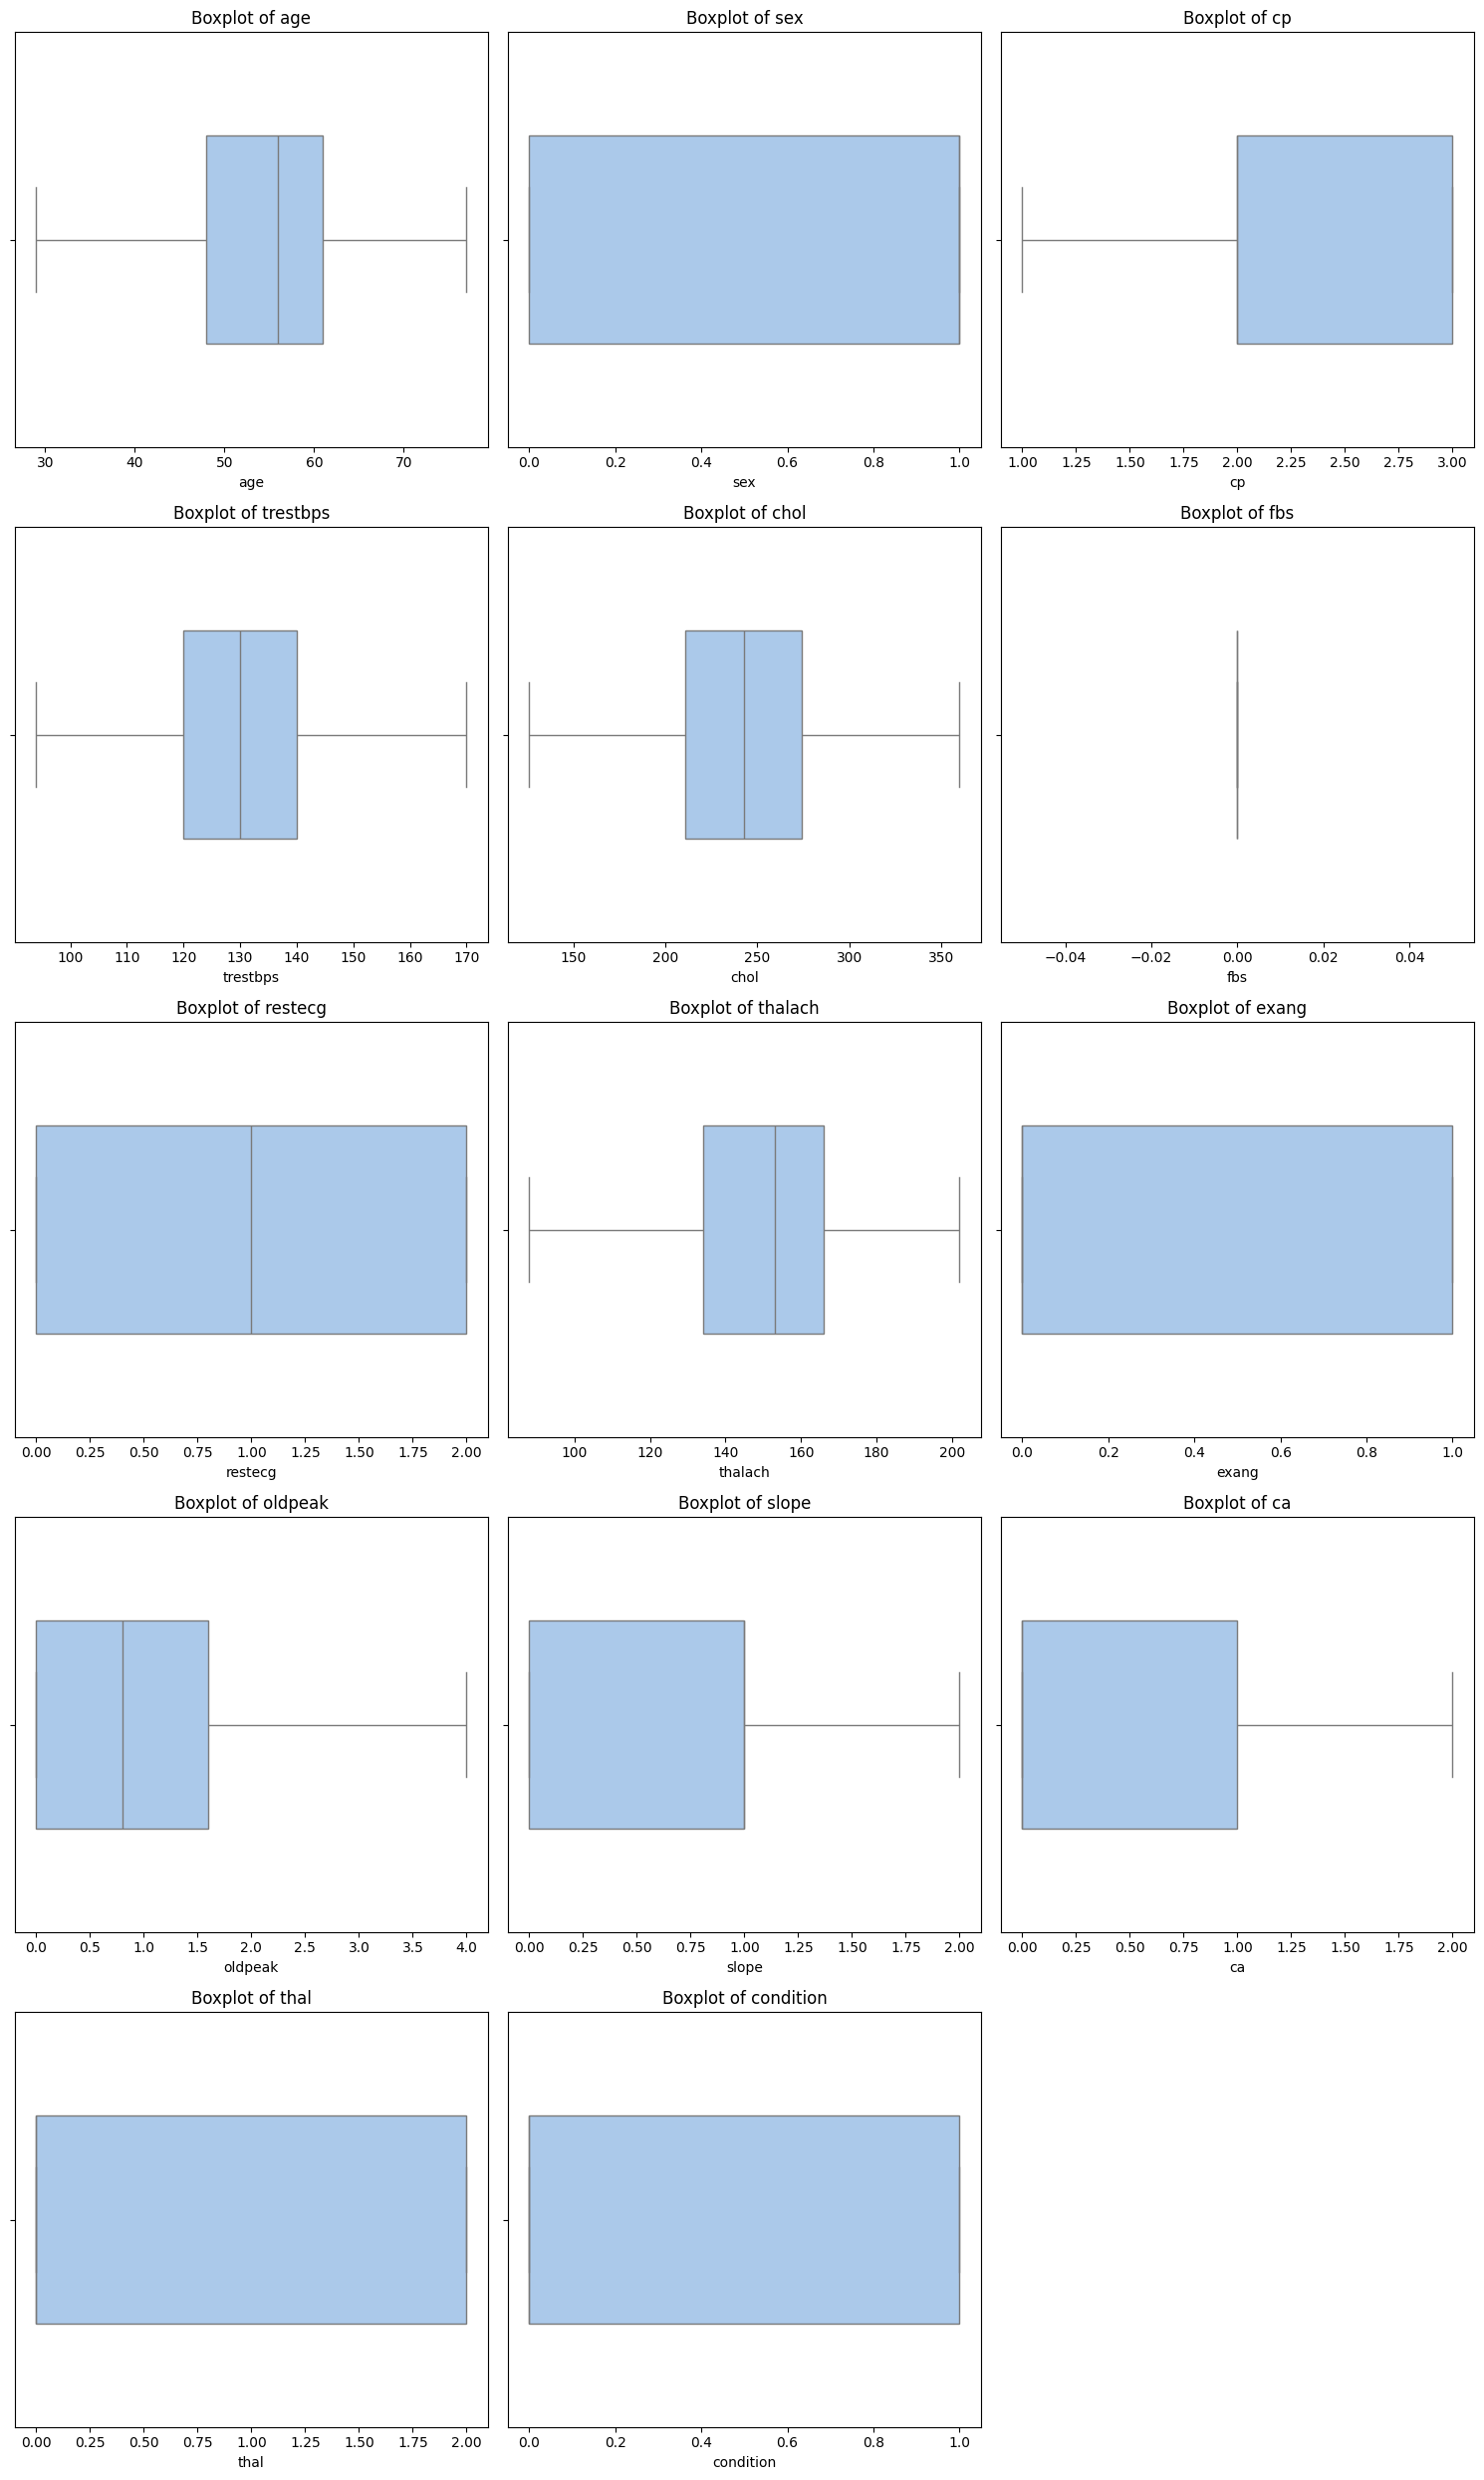

In [32]:
numeric_cols = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5 * n_rows))
axes = axes.flatten() 
for  i , col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i] , palette='pastel', hue=None, width=0.5)
    axes[i].set_title(f'Boxplot of {col}')
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j]) 
    
plt.tight_layout() 

In [33]:
X = df.drop(columns=['condition'])
y = df['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Random Forest Classifier
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87        32
         1.0       0.95      0.71      0.82        28

    accuracy                           0.85        60
   macro avg       0.87      0.84      0.84        60
weighted avg       0.87      0.85      0.85        60



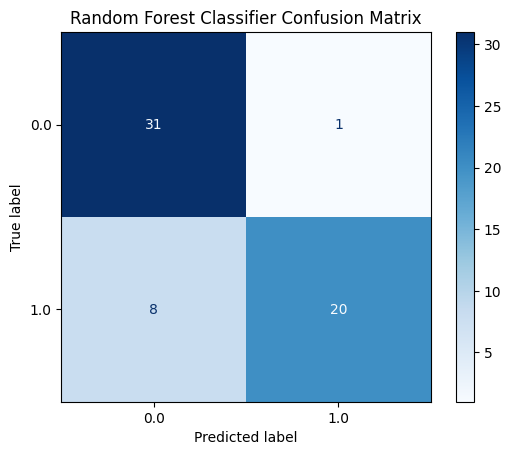

In [39]:
rf1 = RandomForestClassifier(random_state=42, n_jobs=-1)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
print("Random Forest Classifier")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()

Text(0, 0.5, 'Feature')

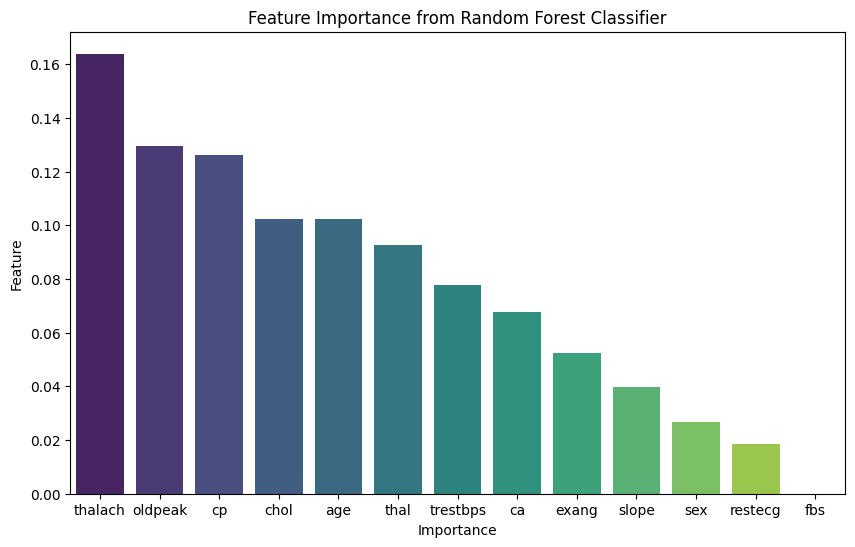

In [40]:
# Feature Importance
feature_importances = rf1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Importance', x='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')



Bagging Classifier
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        32
         1.0       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



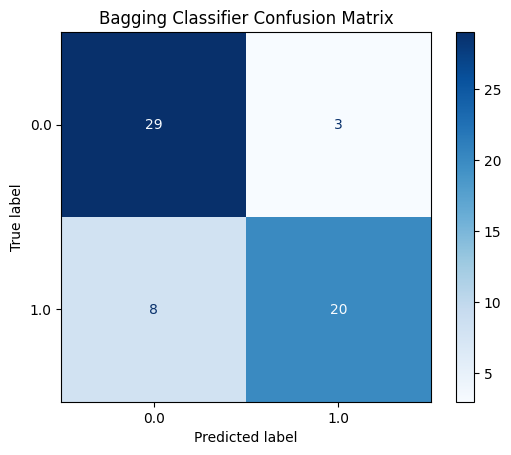

AdaBoost Classifier
              precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        32
         1.0       0.90      0.68      0.78        28

    accuracy                           0.82        60
   macro avg       0.84      0.81      0.81        60
weighted avg       0.83      0.82      0.81        60



Text(0.5, 1.0, 'AdaBoost Classifier Confusion Matrix')

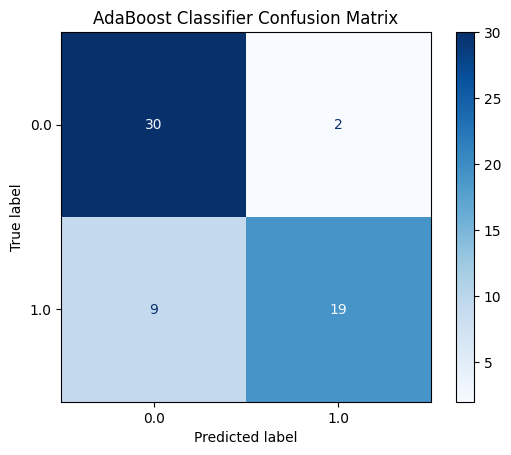

In [43]:
# bagging and bosting
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
bagging = BaggingClassifier(rf1, n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
print("Bagging Classifier")
print(classification_report(y_test, y_pred_bagging))
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
disp_bagging = ConfusionMatrixDisplay(confusion_matrix=cm_bagging, display_labels=bagging.classes_)
disp_bagging.plot(cmap=plt.cm.Blues)
plt.title('Bagging Classifier Confusion Matrix')
plt.show()

ada_boost = AdaBoostClassifier(rf1, n_estimators=50, random_state=42)
ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)
print("AdaBoost Classifier")
print(classification_report(y_test, y_pred_ada))
cm_ada = confusion_matrix(y_test, y_pred_ada)
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=ada_boost.classes_)
disp_ada.plot(cmap=plt.cm.Blues)
plt.title('AdaBoost Classifier Confusion Matrix')


XGBoost Classifier
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        32
         1.0       0.88      0.79      0.83        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



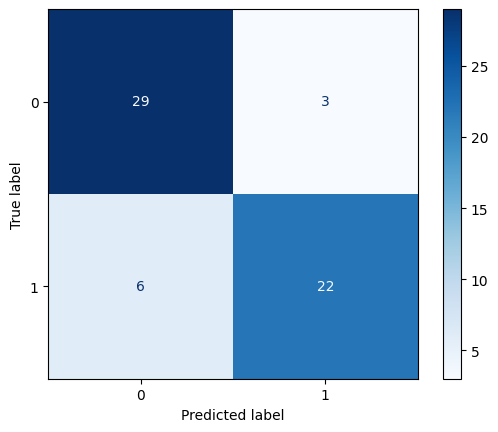

In [49]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp_xgb.plot(cmap=plt.cm.Blues)


           Model  Accuracy  F1 Score
0  Random Forest  0.850000  0.846680
1        Bagging  0.816667  0.814322
2       AdaBoost  0.816667  0.812609
3        XGBoost  0.850000  0.849113


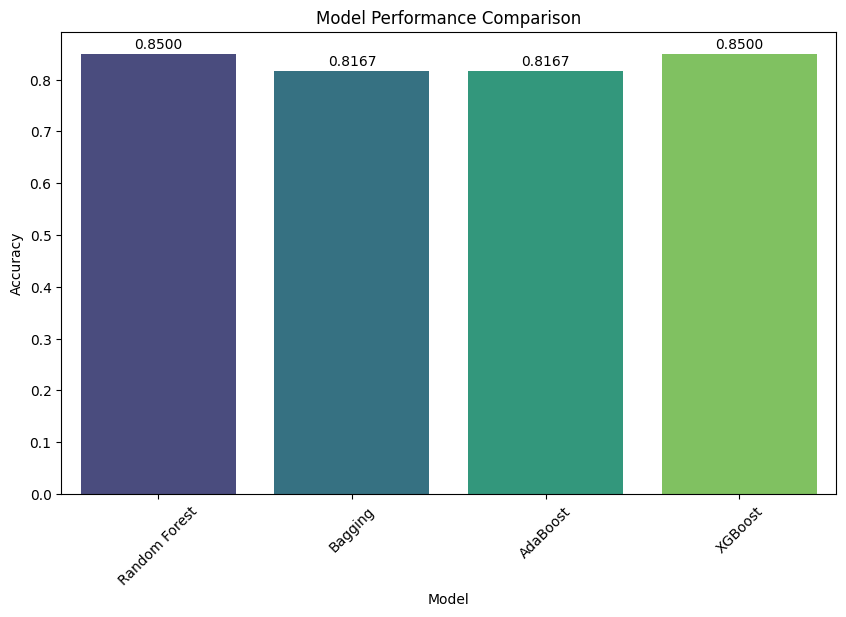

In [59]:
# comare the performance of the models
models = ['Random Forest', 'Bagging', 'AdaBoost', 'XGBoost']
scores = {
    'Model': models,
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_bagging),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred, average='weighted'),
        f1_score(y_test, y_pred_bagging, average='weighted'),
        f1_score(y_test, y_pred_ada, average='weighted'),
        f1_score(y_test, y_pred_xgb, average='weighted')
    ]
}
scores_df = pd.DataFrame(scores)
print(scores_df)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=scores_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
for index, row in scores_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.01, f"{row['Accuracy']:.4f}", color='black', ha='center')
plt.xticks(rotation=45)
plt.show()


# tuning using randomized cv


In [72]:
# tune the model using randomized cv
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_tuned = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Tuned Random Forest Classifier")
print(classification_report(y_test, y_pred_best_rf))
print("Best Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_best_rf))




Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest Classifier
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        32
         1.0       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60

Best Random Forest Classifier Accuracy: 0.8166666666666667


Random Forest Classifier with Hyperparameter Tuning
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84        32
         1.0       0.87      0.71      0.78        28

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



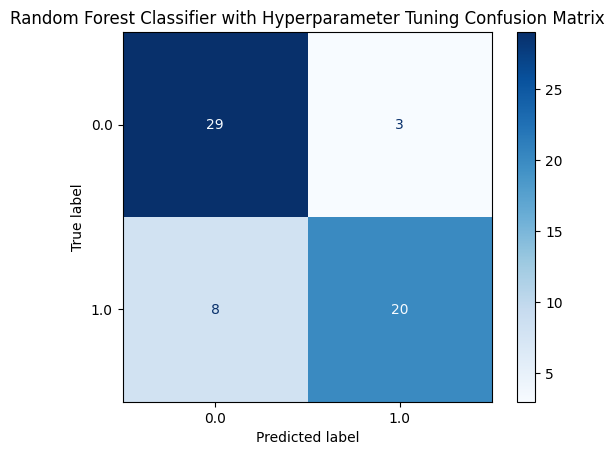

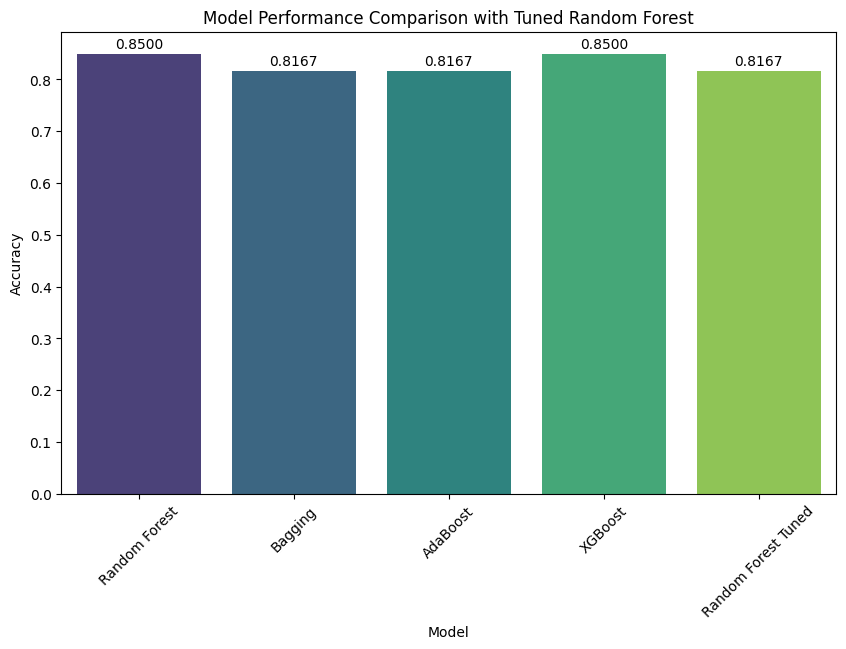